In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
from datetime import datetime, timedelta
import time
import numpy as np
import re
from dateutil.relativedelta import relativedelta
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
from scipy import stats

In [40]:
crash = pd.read_csv('crash_clean.csv', index_col=0)
au_pop = pd.read_csv('AustinPop.csv')

In [41]:
crash.head()

,Crash_ID,Crash_Fatal_Fl,Crash_Date,Crash_Time,Rpt_Rdwy_Sys_ID,Rpt_Hwy_Num,Private_Dr_Fl,Crash_Speed_Limit,At_Intrsct_Fl,Wthr_Cond_ID,...,Obj_Struck_ID,Latitude,Longitude,Street_Name,Street_Nbr,Street_Name_2,Crash_Sev_ID,Day_of_Week,Tot_Injry_Cnt,Death_Cnt
0,11152580,N,01/15/2010,12:06 PM,19,NaN,N,35,N,2,...,64,30.376001,-97.673639,E BRAKER LN,867.0,NaN,3,FRI,2,0
1,11153849,N,01/15/2010,04:32 PM,19,NaN,N,0,Y,12,...,29,30.307715,-97.726472,E 45TH ST,300.0,UNKNOWN,3,FRI,1,0
2,11154056,N,01/13/2010,06:38 PM,19,NaN,N,35,Y,2,...,64,30.265225,-97.740032,E 4TH ST,398.0,TRINITY ST,3,WED,1,0
3,11154058,N,01/13/2010,03:47 PM,19,NaN,N,30,N,12,...,64,30.300115,-97.732672,E 38TH ST,200.0,UNKNOWN,3,WED,1,0
4,11154059,N,01/12/2010,04:51 PM,1,35,N,55,N,11,...,64,30.292341,-97.721250,IH0035,NaN,NaN,5,TUE,0,0


In [42]:
crash["Crash_Date"] = pd.to_datetime(crash["Crash_Date"], format= "%m/%d/%Y")

crash["time_segment"] = np.where((crash["Crash_Date"] <= dt.date(2014,6,1)),"before", 
                              np.where((crash["Crash_Date"] > dt.date(2014,6,1)) & (crash["Crash_Date"] <= dt.date(2016,5,10)), "entry",
                                       np.where((crash["Crash_Date"] > dt.date(2016,5,10)) & (crash["Crash_Date"] <= dt.date(2017,5,29)), "exit",
                                                np.where((crash["Crash_Date"] > dt.date(2017,5,29)), "re-entry",
                                                         "error"))))
crash["uber_present"] = np.where((crash["Crash_Date"] <= dt.date(2014,6,1)),0, 
                              np.where((crash["Crash_Date"] > dt.date(2014,6,1)) & (crash["Crash_Date"] <= dt.date(2016,5,10)), 1,
                                       np.where((crash["Crash_Date"] > dt.date(2016,5,10)) & (crash["Crash_Date"] <= dt.date(2017,5,29)), 0,
                                                np.where((crash["Crash_Date"] > dt.date(2017,5,29)), 1,
                                                         "error"))))

C:\Users\rmead\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\rmead\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
  after removing the cwd from sys.path.
C:\Users\rmead\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.d

In [43]:
crash

,Crash_ID,Crash_Fatal_Fl,Crash_Date,Crash_Time,Rpt_Rdwy_Sys_ID,Rpt_Hwy_Num,Private_Dr_Fl,Crash_Speed_Limit,At_Intrsct_Fl,Wthr_Cond_ID,...,Longitude,Street_Name,Street_Nbr,Street_Name_2,Crash_Sev_ID,Day_of_Week,Tot_Injry_Cnt,Death_Cnt,time_segment,uber_present
0,11152580,N,2010-01-15,12:06 PM,19,NaN,N,35,N,2,...,-97.673639,E BRAKER LN,867.0,NaN,3,FRI,2,0,before,0
1,11153849,N,2010-01-15,04:32 PM,19,NaN,N,0,Y,12,...,-97.726472,E 45TH ST,300.0,UNKNOWN,3,FRI,1,0,before,0
2,11154056,N,2010-01-13,06:38 PM,19,NaN,N,35,Y,2,...,-97.740032,E 4TH ST,398.0,TRINITY ST,3,WED,1,0,before,0
3,11154058,N,2010-01-13,03:47 PM,19,NaN,N,30,N,12,...,-97.732672,E 38TH ST,200.0,UNKNOWN,3,WED,1,0,before,0
4,11154059,N,2010-01-12,04:51 PM,1,35,N,55,N,11,...,-97.721250,IH0035,NaN,NaN,5,TUE,0,0,before,0
5,11154064,N,2010-01-12,10:16 AM,19,NaN,N,40,Y,11,...,-97.723782,E RIVERSIDE DR,NaN,S PLEASANT VALLEY RD,3,TUE,1,0,before,0
6,11154065,N,2010-01-12,07:21 AM,19,NaN,N,55,Y,11,...,-97.691212,E BEN WHITE BLVD,NaN,E RIVERSIDE DR,2,TUE,2,0,before,0
7,11154069,N,2010-01-15,07:31 PM,11,323,N,35,N,2,...,-97.753853,N LAMAR BLVD,601.0,NaN,5,FRI,0,0,before,0
8,11154070,N,2010-01-14,11:43 AM,2,183,N,55,Y,12,...,-97.663621,US0183,NaN,E 51ST ST,3,THU,1,0,before,0
9,11154229,N,2010-01-24,09:33 AM,5,620,N,65,N,11,...,-97.855370,RM0620,NaN,NaN,2,SUN,1,0,before,0


In [44]:
crash_gb = crash[['Crash_ID','Crash_Date']]
crash_gb = crash_gb.set_index('Crash_Date')
annual_crash_numbers = crash_gb.resample('Y', how='count')
annual_crash_numbers = annual_crash_numbers.reset_index()

C:\Users\rmead\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).count()
  This is separate from the ipykernel package so we can avoid doing imports until


C:\Users\rmead\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: MatplotlibDeprecationWarning: 
The frameon kwarg was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use facecolor instead.


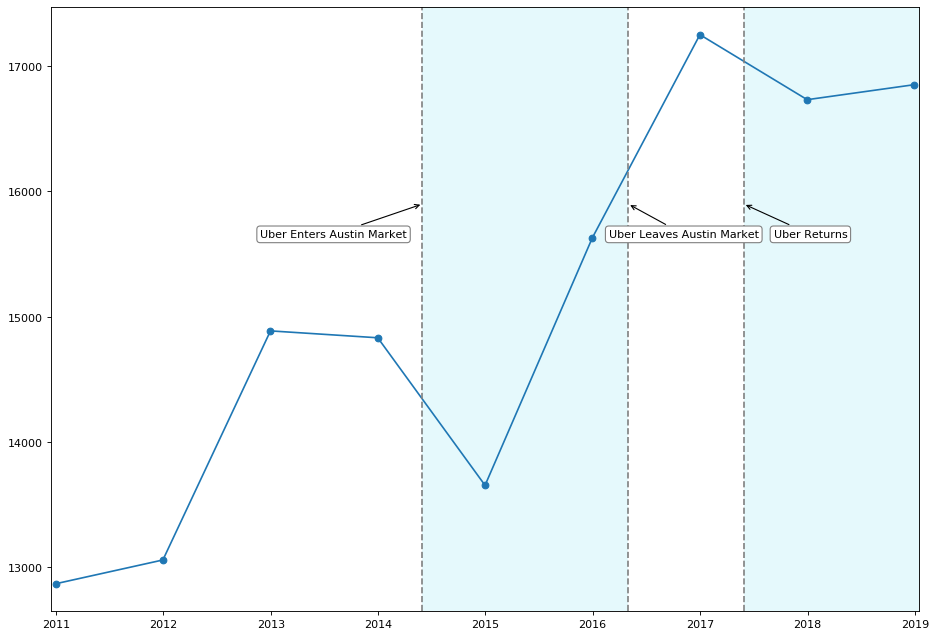

In [45]:
plt.figure(num=None, figsize=(14,10), dpi=80, facecolor='w', edgecolor='k')

plt.plot(annual_crash_numbers['Crash_Date'][:-1],annual_crash_numbers['Crash_ID'][:-1],marker="o")

plt.axvline(dt.date(2014,6,1), color = 'grey', linestyle = '--')
plt.axvline(dt.date(2016,5,1), color = 'grey', linestyle = '--')
plt.axvline(dt.date(2017,5,29), color = 'grey', linestyle = '--')

plt.axvspan(dt.date(2014,6,1), dt.date(2016,5,1), facecolor=(0.031, 0.8, 0.9, 0.1))
plt.axvspan(dt.date(2017,5,29), dt.date(2019,9,30), facecolor=(0.031, 0.8, 0.9, 0.1))

plt.xlim(dt.date(2010,12,15), dt.date(2019,1,15))

plt.annotate("Uber Enters Austin Market", xy=(dt.date(2014,6,1),15900), xycoords='data',
            bbox=dict(boxstyle="round", fc="w", ec="gray"),
            xytext=(-80, -30), textcoords='offset points', ha='center',
            arrowprops=dict(arrowstyle="->"))

plt.annotate("Uber Leaves Austin Market", xy=(dt.date(2016,5,1),15900), xycoords='data',
            bbox=dict(boxstyle="round", fc="w", ec="gray"),
            xytext=(50, -30), textcoords='offset points', ha='center',
            arrowprops=dict(arrowstyle="->"))


plt.annotate("Uber Returns", xy=(dt.date(2017,5,29),15900), xycoords='data',
            bbox=dict(boxstyle="round", fc="w", ec="gray"),
            xytext=(60,-30), textcoords='offset points', ha='center',
            arrowprops=dict(arrowstyle="->"))

plt.savefig('num_crashes.png')

In [8]:
ann_crashes_normalized = annual_crash_numbers
ann_crashes_normalized = ann_crashes_normalized.reset_index()
ann_crashes_normalized['Crash_ID'] = ann_crashes_normalized['Crash_ID']/au_pop['Population']
ann_crashes_normalized = ann_crashes_normalized.rename({'Crash_ID' : 'Crashes per 1000'}, axis='columns')
ann_crashes_normalized['Crashes per 1000'] = ann_crashes_normalized['Crashes per 1000']*1000

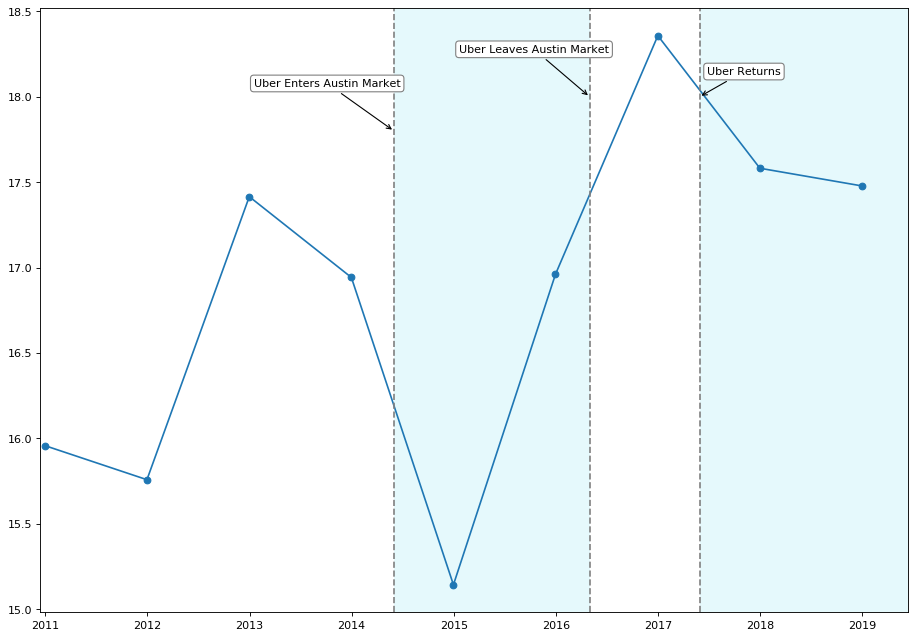

In [9]:
plt.figure(num=None, figsize=(14,10), dpi=80, facecolor='w', edgecolor='k')

plt.plot(ann_crashes_normalized['Crash_Date'][:-1],ann_crashes_normalized['Crashes per 1000'][:-1],marker="o")

plt.axvline(dt.date(2014,6,1), color = 'grey', linestyle = '--')
plt.axvline(dt.date(2016,5,1), color = 'grey', linestyle = '--')
plt.axvline(dt.date(2017,5,29), color = 'grey', linestyle = '--')

plt.axvspan(dt.date(2014,6,1), dt.date(2016,5,1), facecolor=(0.031, 0.8, 0.9, 0.1))
plt.axvspan(dt.date(2017,5,29), dt.date(2019,9,30), facecolor=(0.031, 0.8, 0.9, 0.1))

plt.xlim(dt.date(2010,12,15), dt.date(2019,6,15))

plt.annotate("Uber Enters Austin Market", xy=(dt.date(2014,6,1),17.8), xycoords='data',
            bbox=dict(boxstyle="round", fc="w", ec="gray"),
            xytext=(-60, 40), textcoords='offset points', ha='center',
            arrowprops=dict(arrowstyle="->"))

plt.annotate("Uber Leaves Austin Market", xy=(dt.date(2016,5,1),18), xycoords='data',
            bbox=dict(boxstyle="round", fc="w", ec="gray"),
            xytext=(-50, 40), textcoords='offset points', ha='center',
            arrowprops=dict(arrowstyle="->"))


plt.annotate("Uber Returns", xy=(dt.date(2017,5,29),18), xycoords='data',
            bbox=dict(boxstyle="round", fc="w", ec="gray"),
            xytext=(40,20), textcoords='offset points', ha='center',
            arrowprops=dict(arrowstyle="->"))

plt.savefig('normalized_num_crashes.png')

In [10]:
crash['Hour'] = crash['Crash_Time'].apply(lambda x: x.split(':')[0])
crash['AMPM'] = crash['Crash_Time'].apply(lambda x: x.split(' ')[-1])


In [11]:
crash

,Crash_ID,Crash_Fatal_Fl,Crash_Date,Crash_Time,Rpt_Rdwy_Sys_ID,Rpt_Hwy_Num,Private_Dr_Fl,Crash_Speed_Limit,At_Intrsct_Fl,Wthr_Cond_ID,...,Street_Nbr,Street_Name_2,Crash_Sev_ID,Day_of_Week,Tot_Injry_Cnt,Death_Cnt,time_segment,uber_present,Hour,AMPM
0,11152580,N,2010-01-15,12:06 PM,19,NaN,N,35,N,2,...,867.0,NaN,3,FRI,2,0,before,0,12,PM
1,11153849,N,2010-01-15,04:32 PM,19,NaN,N,0,Y,12,...,300.0,UNKNOWN,3,FRI,1,0,before,0,04,PM
2,11154056,N,2010-01-13,06:38 PM,19,NaN,N,35,Y,2,...,398.0,TRINITY ST,3,WED,1,0,before,0,06,PM
3,11154058,N,2010-01-13,03:47 PM,19,NaN,N,30,N,12,...,200.0,UNKNOWN,3,WED,1,0,before,0,03,PM
4,11154059,N,2010-01-12,04:51 PM,1,35,N,55,N,11,...,NaN,NaN,5,TUE,0,0,before,0,04,PM
5,11154064,N,2010-01-12,10:16 AM,19,NaN,N,40,Y,11,...,NaN,S PLEASANT VALLEY RD,3,TUE,1,0,before,0,10,AM
6,11154065,N,2010-01-12,07:21 AM,19,NaN,N,55,Y,11,...,NaN,E RIVERSIDE DR,2,TUE,2,0,before,0,07,AM
7,11154069,N,2010-01-15,07:31 PM,11,323,N,35,N,2,...,601.0,NaN,5,FRI,0,0,before,0,07,PM
8,11154070,N,2010-01-14,11:43 AM,2,183,N,55,Y,12,...,NaN,E 51ST ST,3,THU,1,0,before,0,11,AM
9,11154229,N,2010-01-24,09:33 AM,5,620,N,65,N,11,...,NaN,NaN,2,SUN,1,0,before,0,09,AM


In [12]:
crash['Hour'] = crash['Hour'] + crash['AMPM']

In [13]:
crash.head()

,Crash_ID,Crash_Fatal_Fl,Crash_Date,Crash_Time,Rpt_Rdwy_Sys_ID,Rpt_Hwy_Num,Private_Dr_Fl,Crash_Speed_Limit,At_Intrsct_Fl,Wthr_Cond_ID,...,Street_Nbr,Street_Name_2,Crash_Sev_ID,Day_of_Week,Tot_Injry_Cnt,Death_Cnt,time_segment,uber_present,Hour,AMPM
0,11152580,N,2010-01-15,12:06 PM,19,NaN,N,35,N,2,...,867.0,NaN,3,FRI,2,0,before,0,12PM,PM
1,11153849,N,2010-01-15,04:32 PM,19,NaN,N,0,Y,12,...,300.0,UNKNOWN,3,FRI,1,0,before,0,04PM,PM
2,11154056,N,2010-01-13,06:38 PM,19,NaN,N,35,Y,2,...,398.0,TRINITY ST,3,WED,1,0,before,0,06PM,PM
3,11154058,N,2010-01-13,03:47 PM,19,NaN,N,30,N,12,...,200.0,UNKNOWN,3,WED,1,0,before,0,03PM,PM
4,11154059,N,2010-01-12,04:51 PM,1,35,N,55,N,11,...,NaN,NaN,5,TUE,0,0,before,0,04PM,PM


In [14]:
night = ['09PM','10PM','11PM','12AM','01AM','02AM','03AM']
morning = ['04AM','05AM','06AM','07AM','08AM','09AM']
day = ['10AM','11AM','12PM','01PM','02PM','03PM']
afternoon = ['04PM','05PM','06PM','07PM','08PM']


In [15]:
crash_night = crash[crash['Hour'].isin(night)]
crash_night = crash_night[['Crash_ID','Crash_Date']]
crash_night = crash_night.set_index('Crash_Date')
night_crash_numbers = crash_night.resample('Y', how='count')
night_crashes_normalized = night_crash_numbers
night_crashes_normalized = night_crashes_normalized.reset_index()
night_crashes_normalized['Crash_ID'] = night_crashes_normalized['Crash_ID']/au_pop['Population']
night_crashes_normalized = night_crashes_normalized.rename({'Crash_ID' : 'Crashes per 1000'}, axis='columns')
night_crashes_normalized['Crashes per 1000'] = night_crashes_normalized['Crashes per 1000']*1000


C:\Users\rmead\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).count()
  after removing the cwd from sys.path.


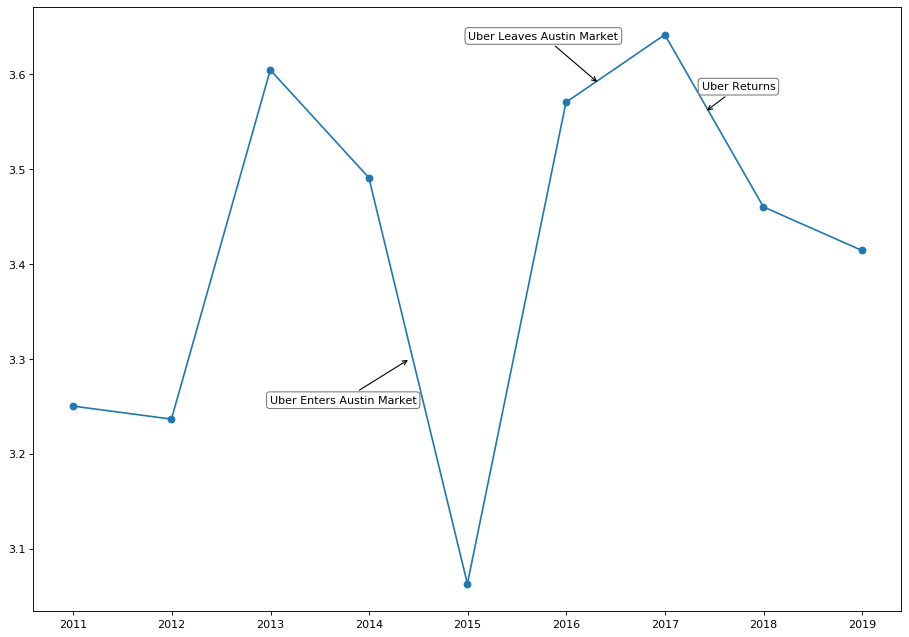

In [16]:
plt.figure(num=None, figsize=(14,10), dpi=80, facecolor='w', edgecolor='k')

plt.plot(night_crashes_normalized['Crash_Date'][:-1],night_crashes_normalized['Crashes per 1000'][:-1],marker="o")

plt.annotate("Uber Enters Austin Market", xy=(dt.date(2014,6,1),3.3), xycoords='data',
            bbox=dict(boxstyle="round", fc="none", ec="gray"),
            xytext=(-60, -40), textcoords='offset points', ha='center',
            arrowprops=dict(arrowstyle="->"))

plt.annotate("Uber Leaves Austin Market", xy=(dt.date(2016,5,1),3.59), xycoords='data',
            bbox=dict(boxstyle="round", fc="none", ec="gray"),
            xytext=(-50, 40), textcoords='offset points', ha='center',
            arrowprops=dict(arrowstyle="->"))


plt.annotate("Uber Returns", xy=(dt.date(2017,5,29),3.56), xycoords='data',
            bbox=dict(boxstyle="round", fc="none", ec="gray"),
            xytext=(30,20), textcoords='offset points', ha='center',
            arrowprops=dict(arrowstyle="->"))

plt.savefig('night_crashes.png')

In [17]:
crash_morn = crash[crash['Hour'].isin(morning)]
crash_morn = crash_morn[['Crash_ID','Crash_Date']]
crash_morn = crash_morn.set_index('Crash_Date')
morn_crash_numbers = crash_morn.resample('Y', how='count')
morn_crashes_normalized = morn_crash_numbers
morn_crashes_normalized = morn_crashes_normalized.reset_index()
morn_crashes_normalized['Crash_ID'] = morn_crashes_normalized['Crash_ID']/au_pop['Population']
morn_crashes_normalized = morn_crashes_normalized.rename({'Crash_ID' : 'Crashes per 1000'}, axis='columns')
morn_crashes_normalized['Crashes per 1000'] = morn_crashes_normalized['Crashes per 1000']*1000


C:\Users\rmead\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).count()
  after removing the cwd from sys.path.


In [18]:
crash_day = crash[crash['Hour'].isin(day)]
crash_day = crash_day[['Crash_ID','Crash_Date']]
crash_day = crash_day.set_index('Crash_Date')
day_crash_numbers = crash_day.resample('Y', how='count')
day_crashes_normalized = day_crash_numbers
day_crashes_normalized = day_crashes_normalized.reset_index()
day_crashes_normalized['Crash_ID'] = day_crashes_normalized['Crash_ID']/au_pop['Population']
day_crashes_normalized = day_crashes_normalized.rename({'Crash_ID' : 'Crashes per 1000'}, axis='columns')
day_crashes_normalized['Crashes per 1000'] = day_crashes_normalized['Crashes per 1000']*1000


C:\Users\rmead\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).count()
  after removing the cwd from sys.path.


In [19]:
crash_af = crash[crash['Hour'].isin(afternoon)]
crash_af = crash_af[['Crash_ID','Crash_Date']]
crash_af = crash_af.set_index('Crash_Date')
af_crash_numbers = crash_af.resample('Y', how='count')
af_crashes_normalized = af_crash_numbers
af_crashes_normalized = af_crashes_normalized.reset_index()
af_crashes_normalized['Crash_ID'] = af_crashes_normalized['Crash_ID']/au_pop['Population']
af_crashes_normalized = af_crashes_normalized.rename({'Crash_ID' : 'Crashes per 1000'}, axis='columns')
af_crashes_normalized['Crashes per 1000'] = af_crashes_normalized['Crashes per 1000']*1000


C:\Users\rmead\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).count()
  after removing the cwd from sys.path.


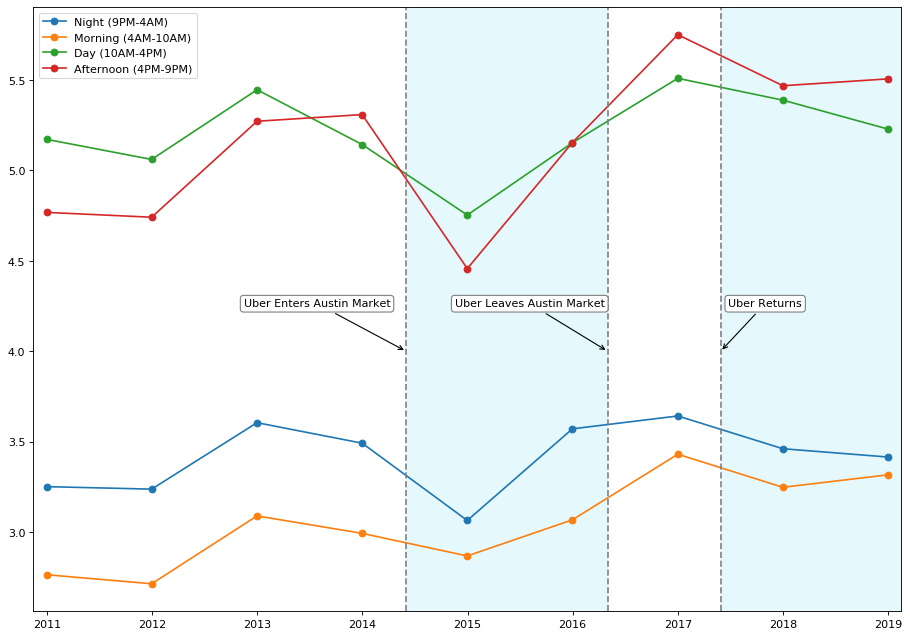

In [20]:
plt.figure(num=None, figsize=(14,10), dpi=80, facecolor='w', edgecolor='k')

plt.plot(night_crashes_normalized['Crash_Date'][:-1],night_crashes_normalized['Crashes per 1000'][:-1],marker="o", label = "Night (9PM-4AM)")
plt.plot(morn_crashes_normalized['Crash_Date'][:-1],morn_crashes_normalized['Crashes per 1000'][:-1],marker="o", label = "Morning (4AM-10AM)")
plt.plot(day_crashes_normalized['Crash_Date'][:-1],day_crashes_normalized['Crashes per 1000'][:-1],marker="o", label = "Day (10AM-4PM)")
plt.plot(af_crashes_normalized['Crash_Date'][:-1],af_crashes_normalized['Crashes per 1000'][:-1],marker="o", label = "Afternoon (4PM-9PM)")

plt.legend()

plt.axvline(dt.date(2014,6,1), color = 'grey', linestyle = '--')
plt.axvline(dt.date(2016,5,1), color = 'grey', linestyle = '--')
plt.axvline(dt.date(2017,5,29), color = 'grey', linestyle = '--')

plt.axvspan(dt.date(2014,6,1), dt.date(2016,5,1), facecolor=(0.031, 0.8, 0.9, 0.1))
plt.axvspan(dt.date(2017,5,29), dt.date(2019,9,30), facecolor=(0.031, 0.8, 0.9, 0.1))

plt.xlim(dt.date(2010,11,15), dt.date(2019,2,15))


plt.annotate("Uber Enters Austin Market", xy=(dt.date(2014,6,1),4), xycoords='data',
            bbox=dict(boxstyle="round", fc="w", ec="gray"),
            xytext=(-80, 40), textcoords='offset points', ha='center',
            arrowprops=dict(arrowstyle="->"))

plt.annotate("Uber Leaves Austin Market", xy=(dt.date(2016,5,1),4), xycoords='data',
            bbox=dict(boxstyle="round", fc="w", ec="gray"),
            xytext=(-70, 40), textcoords='offset points', ha='center',
            arrowprops=dict(arrowstyle="->"))


plt.annotate("Uber Returns", xy=(dt.date(2017,5,29),4), xycoords='data',
            bbox=dict(boxstyle="round", fc="w", ec="gray"),
            xytext=(40,40), textcoords='offset points', ha='center',
            arrowprops=dict(arrowstyle="->"))

# plt.title('Normalized Number of Crashes Split by Time of Day')

plt.savefig('num_crashes_tod.png')

In [21]:
crash

,Crash_ID,Crash_Fatal_Fl,Crash_Date,Crash_Time,Rpt_Rdwy_Sys_ID,Rpt_Hwy_Num,Private_Dr_Fl,Crash_Speed_Limit,At_Intrsct_Fl,Wthr_Cond_ID,...,Street_Nbr,Street_Name_2,Crash_Sev_ID,Day_of_Week,Tot_Injry_Cnt,Death_Cnt,time_segment,uber_present,Hour,AMPM
0,11152580,N,2010-01-15,12:06 PM,19,NaN,N,35,N,2,...,867.0,NaN,3,FRI,2,0,before,0,12PM,PM
1,11153849,N,2010-01-15,04:32 PM,19,NaN,N,0,Y,12,...,300.0,UNKNOWN,3,FRI,1,0,before,0,04PM,PM
2,11154056,N,2010-01-13,06:38 PM,19,NaN,N,35,Y,2,...,398.0,TRINITY ST,3,WED,1,0,before,0,06PM,PM
3,11154058,N,2010-01-13,03:47 PM,19,NaN,N,30,N,12,...,200.0,UNKNOWN,3,WED,1,0,before,0,03PM,PM
4,11154059,N,2010-01-12,04:51 PM,1,35,N,55,N,11,...,NaN,NaN,5,TUE,0,0,before,0,04PM,PM
5,11154064,N,2010-01-12,10:16 AM,19,NaN,N,40,Y,11,...,NaN,S PLEASANT VALLEY RD,3,TUE,1,0,before,0,10AM,AM
6,11154065,N,2010-01-12,07:21 AM,19,NaN,N,55,Y,11,...,NaN,E RIVERSIDE DR,2,TUE,2,0,before,0,07AM,AM
7,11154069,N,2010-01-15,07:31 PM,11,323,N,35,N,2,...,601.0,NaN,5,FRI,0,0,before,0,07PM,PM
8,11154070,N,2010-01-14,11:43 AM,2,183,N,55,Y,12,...,NaN,E 51ST ST,3,THU,1,0,before,0,11AM,AM
9,11154229,N,2010-01-24,09:33 AM,5,620,N,65,N,11,...,NaN,NaN,2,SUN,1,0,before,0,09AM,AM


In [22]:
crash_gb = crash[['Crash_ID','Crash_Date']]
crash_gb = crash_gb.set_index('Crash_Date')
mo_crash_numbers = crash_gb.resample('M', how='count')
mo_crashes_normalized = mo_crash_numbers
mo_crashes_normalized = mo_crashes_normalized.reset_index()

C:\Users\rmead\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).count()
  This is separate from the ipykernel package so we can avoid doing imports until


In [23]:
mo_pop = pd.read_csv('AustinMonthlyPop.csv')

In [24]:
mo_crashes_normalized['Crash_ID'] = mo_crashes_normalized['Crash_ID']/mo_pop['Population']
mo_crashes_normalized = mo_crashes_normalized.rename({'Crash_ID' : 'Crashes per 1000'}, axis='columns')
mo_crashes_normalized['Crashes per 1000'] = mo_crashes_normalized['Crashes per 1000']*1000

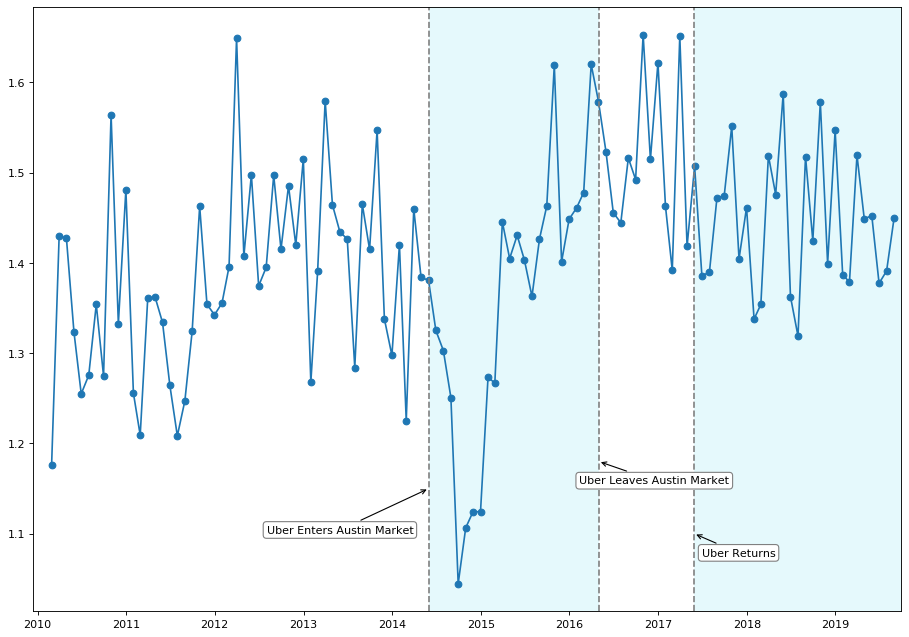

In [25]:
plt.figure(num=None, figsize=(14,10), dpi=80, facecolor='w', edgecolor='k')

plt.plot(mo_crashes_normalized['Crash_Date'][1:-1],mo_crashes_normalized['Crashes per 1000'][1:-1],marker="o")

plt.axvline(dt.date(2014,6,1), color = 'grey', linestyle = '--')
plt.axvline(dt.date(2016,5,1), color = 'grey', linestyle = '--')
plt.axvline(dt.date(2017,5,29), color = 'grey', linestyle = '--')

plt.axvspan(dt.date(2014,6,1), dt.date(2016,5,1), facecolor=(0.031, 0.8, 0.9, 0.1))
plt.axvspan(dt.date(2017,5,29), dt.date(2019,9,30), facecolor=(0.031, 0.8, 0.9, 0.1))

plt.xlim(dt.date(2009,12,15), dt.date(2019,9,30))

plt.annotate("Uber Enters Austin Market", xy=(dt.date(2014,6,1),1.15), xycoords='data',
            bbox=dict(boxstyle="round", fc="w", ec="gray"),
            xytext=(-80, -40), textcoords='offset points', ha='center',
            arrowprops=dict(arrowstyle="->"))

plt.annotate("Uber Leaves Austin Market", xy=(dt.date(2016,5,1),1.18), xycoords='data',
            bbox=dict(boxstyle="round", fc="w", ec="gray"),
            xytext=(50, -20), textcoords='offset points', ha='center',
            arrowprops=dict(arrowstyle="->"))


plt.annotate("Uber Returns", xy=(dt.date(2017,5,29),1.1), xycoords='data',
            bbox=dict(boxstyle="round", fc="w", ec="gray"),
            xytext=(40,-20), textcoords='offset points', ha='center',
            arrowprops=dict(arrowstyle="->"))

plt.savefig('monthly_crashes.png')

Text(40, -20, 'Uber Returns')

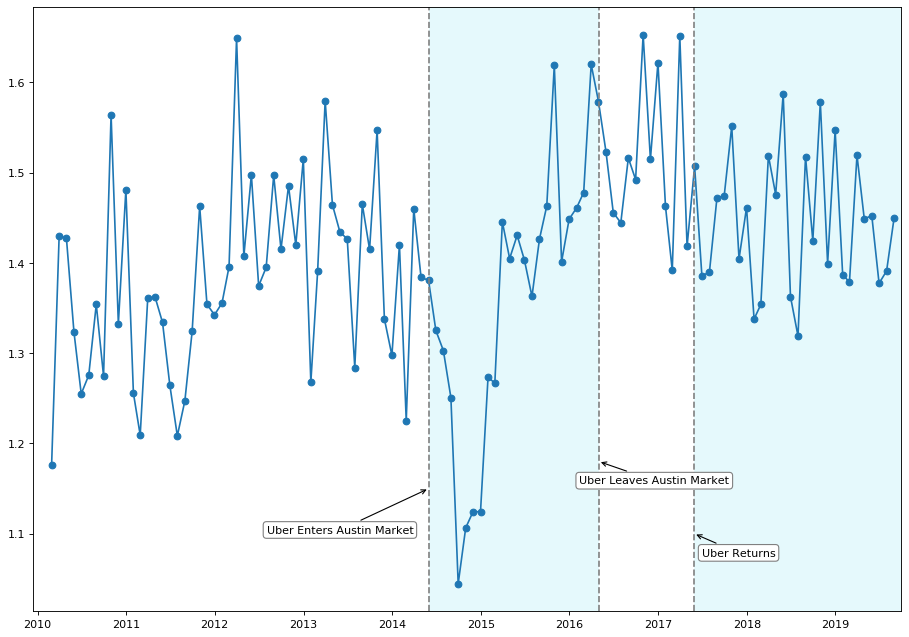

In [26]:
plt.figure(num=None, figsize=(14,10), dpi=80, facecolor='w', edgecolor='k')

plt.plot(mo_crashes_normalized['Crash_Date'][1:-1],mo_crashes_normalized['Crashes per 1000'][1:-1],marker="o")

plt.axvline(dt.date(2014,6,1), color = 'grey', linestyle = '--')
plt.axvline(dt.date(2016,5,1), color = 'grey', linestyle = '--')
plt.axvline(dt.date(2017,5,29), color = 'grey', linestyle = '--')

plt.axvspan(dt.date(2014,6,1), dt.date(2016,5,1), facecolor=(0.031, 0.8, 0.9, 0.1))
plt.axvspan(dt.date(2017,5,29), dt.date(2019,9,30), facecolor=(0.031, 0.8, 0.9, 0.1))

plt.xlim(dt.date(2009,12,15), dt.date(2019,9,30))

plt.annotate("Uber Enters Austin Market", xy=(dt.date(2014,6,1),1.15), xycoords='data',
            bbox=dict(boxstyle="round", fc="w", ec="gray"),
            xytext=(-80, -40), textcoords='offset points', ha='center',
            arrowprops=dict(arrowstyle="->"))

plt.annotate("Uber Leaves Austin Market", xy=(dt.date(2016,5,1),1.18), xycoords='data',
            bbox=dict(boxstyle="round", fc="w", ec="gray"),
            xytext=(50, -20), textcoords='offset points', ha='center',
            arrowprops=dict(arrowstyle="->"))


plt.annotate("Uber Returns", xy=(dt.date(2017,5,29),1.1), xycoords='data',
            bbox=dict(boxstyle="round", fc="w", ec="gray"),
            xytext=(40,-20), textcoords='offset points', ha='center',
            arrowprops=dict(arrowstyle="->"))

In [27]:
crashes_by_sev = []

for i in range(0,6):
    crash_sev = crash[crash['Crash_Sev_ID']== i]
    crash_sev = crash_sev[['Crash_ID','Crash_Date']]
    crash_sev = crash_sev.set_index('Crash_Date')
    sev_crash_numbers = crash_sev.resample('M', how='count')
    sev_crashes_normalized = sev_crash_numbers
    sev_crashes_normalized = sev_crashes_normalized.reset_index()
    sev_crashes_normalized['Crash_ID'] = sev_crashes_normalized['Crash_ID']/mo_pop['Population']
    sev_crashes_normalized = sev_crashes_normalized.rename({'Crash_ID' : 'Crashes per 1000'}, axis='columns')
    sev_crashes_normalized['Crashes per 1000'] = sev_crashes_normalized['Crashes per 1000']*1000
    crashes_by_sev.append(sev_crashes_normalized)


C:\Users\rmead\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).count()
  import sys


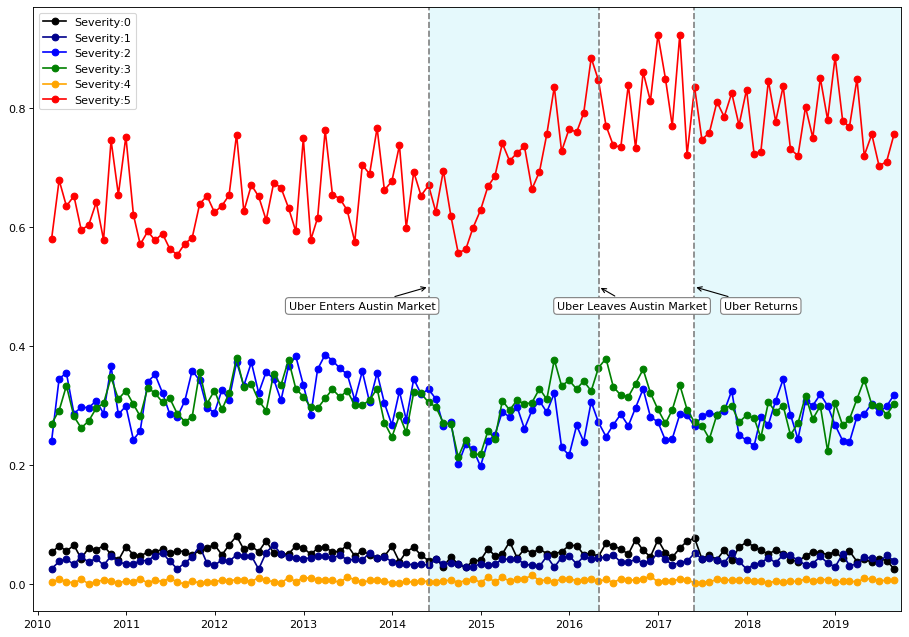

In [28]:
colors = ['black','darkblue','blue','green','orange','red']

plt.figure(num=None, figsize=(14,10), dpi=80, facecolor='w', edgecolor='k')

for i in range(0,6):
    plt.plot(crashes_by_sev[i]['Crash_Date'][1:-1],crashes_by_sev[i]['Crashes per 1000'][1:-1],marker="o", color=colors[i], label='Severity:'+str(i))


plt.axvline(dt.date(2014,6,1), color = 'grey', linestyle = '--')
plt.axvline(dt.date(2016,5,1), color = 'grey', linestyle = '--')
plt.axvline(dt.date(2017,5,29), color = 'grey', linestyle = '--')

plt.axvspan(dt.date(2014,6,1), dt.date(2016,5,1), facecolor=(0.031, 0.8, 0.9, 0.1))
plt.axvspan(dt.date(2017,5,29), dt.date(2019,9,30), facecolor=(0.031, 0.8, 0.9, 0.1))

plt.xlim(dt.date(2009,12,15), dt.date(2019,9,30))
             
plt.legend()

plt.annotate("Uber Enters Austin Market", xy=(dt.date(2014,6,1),0.5), xycoords='data',
            bbox=dict(boxstyle="round", fc="w", ec="gray"),
            xytext=(-60, -20), textcoords='offset points', ha='center',
            arrowprops=dict(arrowstyle="->"))

plt.annotate("Uber Leaves Austin Market", xy=(dt.date(2016,5,1),0.5), xycoords='data',
            bbox=dict(boxstyle="round", fc="w", ec="gray"),
            xytext=(30, -20), textcoords='offset points', ha='center',
            arrowprops=dict(arrowstyle="->"))


plt.annotate("Uber Returns", xy=(dt.date(2017,5,29),0.5), xycoords='data',
            bbox=dict(boxstyle="round", fc="w", ec="gray"),
            xytext=(60,-20), textcoords='offset points', ha='center',
            arrowprops=dict(arrowstyle="->"))

plt.savefig('severity_crashes.png')

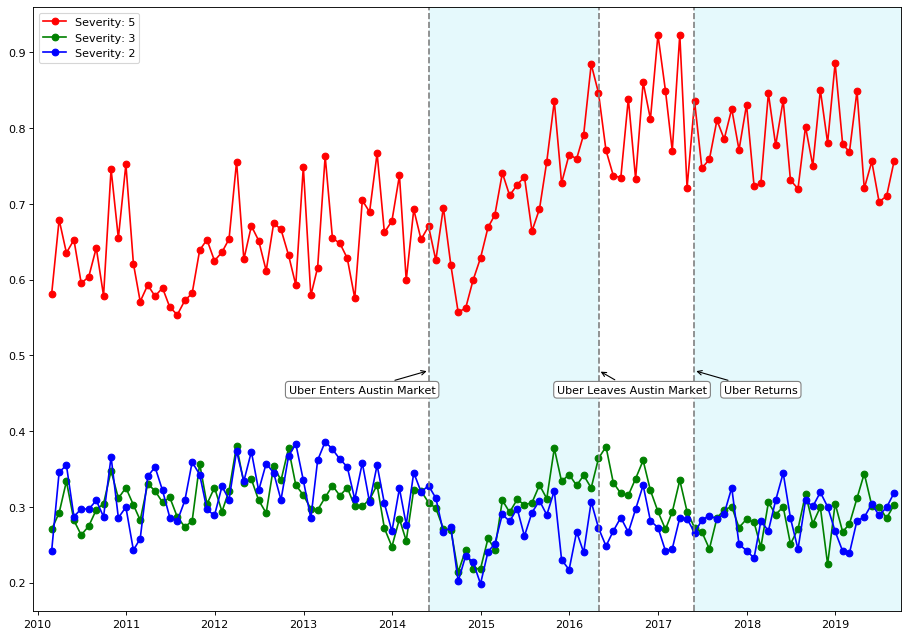

In [29]:
plt.figure(num=None, figsize=(14,10), dpi=80, facecolor='w', edgecolor='k')

plt.plot(crashes_by_sev[5]['Crash_Date'][1:-1],crashes_by_sev[5]['Crashes per 1000'][1:-1],marker="o", color = colors[5], label='Severity: 5')
plt.plot(crashes_by_sev[3]['Crash_Date'][1:-1],crashes_by_sev[3]['Crashes per 1000'][1:-1],marker="o", color = colors[3], label='Severity: 3')
plt.plot(crashes_by_sev[2]['Crash_Date'][1:-1],crashes_by_sev[2]['Crashes per 1000'][1:-1],marker="o", color = colors[2], label='Severity: 2')


plt.axvline(dt.date(2014,6,1), color = 'grey', linestyle = '--')
plt.axvline(dt.date(2016,5,1), color = 'grey', linestyle = '--')
plt.axvline(dt.date(2017,5,29), color = 'grey', linestyle = '--')

plt.axvspan(dt.date(2014,6,1), dt.date(2016,5,1), facecolor=(0.031, 0.8, 0.9, 0.1))
plt.axvspan(dt.date(2017,5,29), dt.date(2019,9,30), facecolor=(0.031, 0.8, 0.9, 0.1))

plt.xlim(dt.date(2009,12,15), dt.date(2019,9,30))
             
plt.legend()

plt.annotate("Uber Enters Austin Market", xy=(dt.date(2014,6,1),0.48), xycoords='data',
            bbox=dict(boxstyle="round", fc="w", ec="gray"),
            xytext=(-60, -20), textcoords='offset points', ha='center',
            arrowprops=dict(arrowstyle="->"))

plt.annotate("Uber Leaves Austin Market", xy=(dt.date(2016,5,1),0.48), xycoords='data',
            bbox=dict(boxstyle="round", fc="w", ec="gray"),
            xytext=(30, -20), textcoords='offset points', ha='center',
            arrowprops=dict(arrowstyle="->"))


plt.annotate("Uber Returns", xy=(dt.date(2017,5,29),0.48), xycoords='data',
            bbox=dict(boxstyle="round", fc="w", ec="gray"),
            xytext=(60,-20), textcoords='offset points', ha='center',
            arrowprops=dict(arrowstyle="->"))

plt.savefig('severity235_crashes.png')

In [30]:
crashes_by_dow = []
dow = ['MON','TUE','WED','THU','FRI','SAT','SUN']

for day in dow:
    crash_dow = crash[crash['Day_of_Week']== day]
    crash_dow = crash_dow[['Crash_ID','Crash_Date']]
    crash_dow = crash_dow.set_index('Crash_Date')
    dow_crash_numbers = crash_dow.resample('M', how='count')
    dow_crashes_normalized = dow_crash_numbers
    dow_crashes_normalized = dow_crashes_normalized.reset_index()
    dow_crashes_normalized['Crash_ID'] = dow_crashes_normalized['Crash_ID']/mo_pop['Population']
    dow_crashes_normalized = dow_crashes_normalized.rename({'Crash_ID' : 'Crashes per 1000'}, axis='columns')
    dow_crashes_normalized['Crashes per 1000'] = dow_crashes_normalized['Crashes per 1000']*1000
    crashes_by_dow.append(dow_crashes_normalized)


C:\Users\rmead\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).count()
  


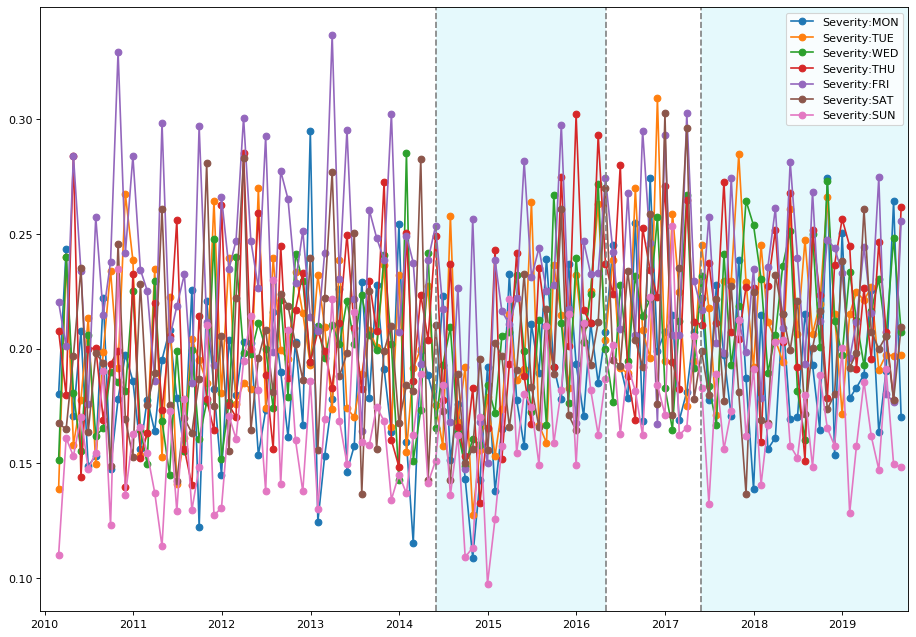

In [31]:
plt.figure(num=None, figsize=(14,10), dpi=80, facecolor='w', edgecolor='k')

for i in range(0,7):
    plt.plot(crashes_by_dow[i]['Crash_Date'][1:-1],crashes_by_dow[i]['Crashes per 1000'][1:-1],marker="o", label='Severity:'+dow[i])


plt.axvline(dt.date(2014,6,1), color = 'grey', linestyle = '--')
plt.axvline(dt.date(2016,5,1), color = 'grey', linestyle = '--')
plt.axvline(dt.date(2017,5,29), color = 'grey', linestyle = '--')

plt.axvspan(dt.date(2014,6,1), dt.date(2016,5,1), facecolor=(0.031, 0.8, 0.9, 0.1))
plt.axvspan(dt.date(2017,5,29), dt.date(2019,9,30), facecolor=(0.031, 0.8, 0.9, 0.1))

plt.xlim(dt.date(2009,12,15), dt.date(2019,9,30))
             
plt.legend()

In [32]:
weekend = crashes_by_dow[-1].append(crashes_by_dow[-2]).append(crashes_by_dow[-3])
weekend = weekend.set_index('Crash_Date')
weekend = weekend.resample('M', how='sum')
weekend = weekend.reset_index()

C:\Users\rmead\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).sum()
  This is separate from the ipykernel package so we can avoid doing imports until


In [33]:
week = crashes_by_dow[0].append(crashes_by_dow[1]).append(crashes_by_dow[2]).append(crashes_by_dow[3])
week = week.set_index('Crash_Date')
week = week.resample('M', how='sum')
week = week.reset_index()

C:\Users\rmead\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).sum()
  This is separate from the ipykernel package so we can avoid doing imports until


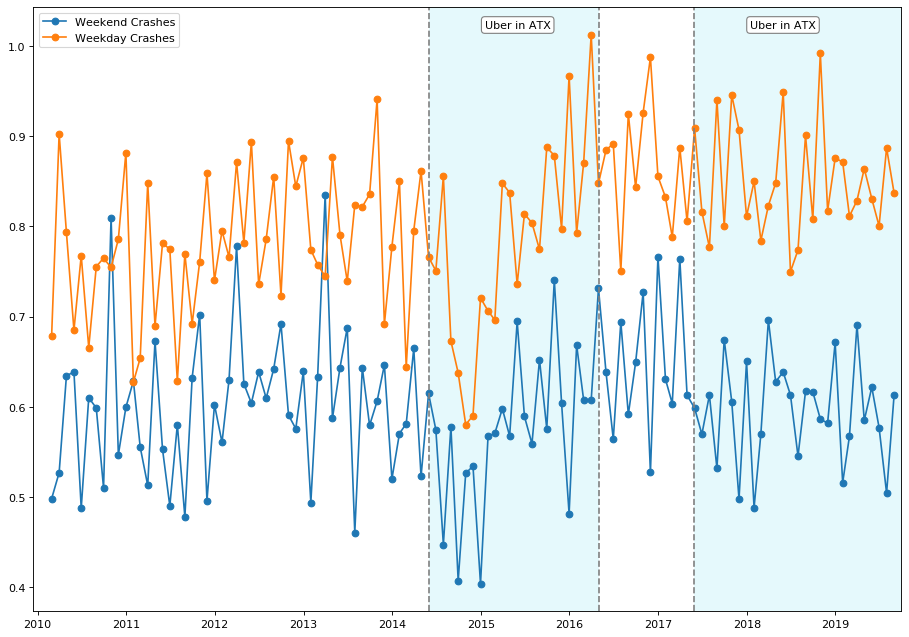

In [34]:
plt.figure(num=None, figsize=(14,10), dpi=80, facecolor='w', edgecolor='k')

plt.plot(weekend['Crash_Date'][1:-1],weekend['Crashes per 1000'][1:-1],marker="o", label='Weekend Crashes')
plt.plot(week['Crash_Date'][1:-1],week['Crashes per 1000'][1:-1],marker="o", label='Weekday Crashes')


plt.axvline(dt.date(2014,6,1), color = 'grey', linestyle = '--')
plt.axvline(dt.date(2016,5,1), color = 'grey', linestyle = '--')
plt.axvline(dt.date(2017,5,29), color = 'grey', linestyle = '--')

plt.axvspan(dt.date(2014,6,1), dt.date(2016,5,1), facecolor=(0.031, 0.8, 0.9, 0.1))
plt.axvspan(dt.date(2017,5,29), dt.date(2019,9,30), facecolor=(0.031, 0.8, 0.9, 0.1))

plt.xlim(dt.date(2009,12,15), dt.date(2019,9,30))
             
plt.legend()

plt.annotate("Uber in ATX", xy=(dt.date(2014,6,1),1.02), xycoords='data',
            bbox=dict(boxstyle="round", fc="w", ec="gray"),
            xytext=(80,0), textcoords='offset points', ha='center')

plt.annotate("Uber in ATX", xy=(dt.date(2017,5,29),1.02), xycoords='data',
            bbox=dict(boxstyle="round", fc="w", ec="gray"),
            xytext=(80,0), textcoords='offset points', ha='center')

plt.savefig('weekday_crashes.png')

In [35]:
annual_crash_numbers['Population'] = au_pop['Population']
annual_crash_numbers.insert(2, "Uber", [0,0,0,0,.5,1,.6,.4,1,1], True) 
annual_crash_numbers['Crash_Date'] = annual_crash_numbers['Crash_Date'].map(lambda x: x.year)

In [36]:
lr = linear_model.LinearRegression()
x = annual_crash_numbers[['Population','Uber']]
y = annual_crash_numbers['Crash_ID']
x['Population'] = x['Population'].map(lambda x: x/1000)

C:\Users\rmead\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [37]:
x = sm.tools.add_constant(x)

est = sm.OLS(y, x)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:               Crash_ID   R-squared:                       0.121
Model:                            OLS   Adj. R-squared:                 -0.131
Method:                 Least Squares   F-statistic:                    0.4803
Date:                Sun, 17 Nov 2019   Prob (F-statistic):              0.638
Time:                        16:04:33   Log-Likelihood:                -88.648
No. Observations:                  10   AIC:                             183.3
Df Residuals:                       7   BIC:                             184.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        163.0831   1.82e+04      0.009      0.9

C:\Users\rmead\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
C:\Users\rmead\Anaconda3\lib\site-packages\scipy\stats\stats.py:1416: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))
